# Seasonal Succession 

### In ecology, beta diversity (β-diversity or true beta diversity) is the ratio between regional and local species diversity.

In [1]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure
import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 

import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import pylab 
from copy import deepcopy
import pandas as pd
import os
import matplotlib

In [2]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [3]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

## Input file with output parameters

In [4]:
## Jessica's Path 
jluo_path = '/glade/scratch/jluo/archive/g.e21.G1850ECOIAF.t62_g17.marbl0_33.'

## Gaby's Path
gabyn_path = '/glade/scratch/gabyn/archive/g.e21.G1850ECOIAF.t62_g17.marbl0_33.'

# path 
path_file = 'g.e21.G1850ECOIAF.t62_g17.marbl0_33.'

In [5]:
print('What is the file you want to comapre with? (new_file)?')
new_file = input('')
print('What year is the new_file? (year)')
new_year = input('')

What is the file you want to comapre with? (new_file)?


 GNG595


What year is the new_file? (year)


 20yrclim


In [6]:
### 20 year climatology GNG513b from 43 to 62 representing Jan 1990 - Dec 2009. 
newNCDFfiles = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim/*', recursive=True),
                      key=numericalSort)

ds= xr.open_mfdataset(newNCDFfiles,combine='by_coords')

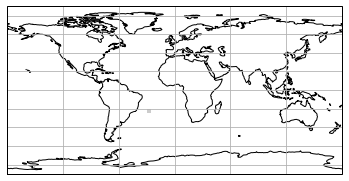

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import cartopy.crs as ccrs

desired_projections = [ccrs.PlateCarree()]
for plot_num, desired_proj in enumerate(desired_projections):

    ax = plt.subplot(1, 1, plot_num + 1, projection=desired_proj)

    ax.set_global()

    ax.add_patch(mpatches.Rectangle(xy=[-30, -25], width=5, height=5,
                                    facecolor='black',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree())
                 )

    ax.gridlines()
    ax.coastlines()

plt.show()

In [8]:
ppC_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_ppC.*.nc', recursive=True))
ppC_ds = xr.open_mfdataset(ppC_inds,combine='by_coords')
mp1C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_mp1C.*.nc', recursive=True))
mp1C_ds = xr.open_mfdataset(mp1C_inds,combine='by_coords')
mp2C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_mp2C.*.nc', recursive=True))
mp2C_ds = xr.open_mfdataset(mp2C_inds,combine='by_coords')
mp3C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_mp3C.*.nc', recursive=True))
mp3C_ds = xr.open_mfdataset(mp3C_inds,combine='by_coords')
mp4C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_mp4C.*.nc', recursive=True))
mp4C_ds = xr.open_mfdataset(mp4C_inds,combine='by_coords')
diazC_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_diazC.*.nc', recursive=True))
diazC_ds = xr.open_mfdataset(diazC_inds,combine='by_coords')
diat1C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_diat1C.*.nc', recursive=True))
diat1C_ds = xr.open_mfdataset(diat1C_inds,combine='by_coords')
diat2C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_diat2C.*.nc', recursive=True))
diat2C_ds = xr.open_mfdataset(diat2C_inds,combine='by_coords')
diat3C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_GNG595_diat3C.*.nc', recursive=True))
diat3C_ds = xr.open_mfdataset(diat3C_inds,combine='by_coords')

In [9]:
phytoC = np.stack([ppC_ds.ppC, mp1C_ds.mp1C, diazC_ds.diazC, 
                               diat1C_ds.diat1C, mp2C_ds.mp2C, diat2C_ds.diat2C, 
                               mp3C_ds.mp3C, diat3C_ds.diat3C, mp4C_ds.mp4C])

phytoC = np.sum(phytoC, axis =2) * 10 #integrate over depth #mmol m-2

In [10]:
zoo1_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/remapgrid_GNG595_zoo1C.*.nc', recursive=True))
zoo1_ds = xr.open_mfdataset(zoo1_inds,combine='by_coords')
zoo2_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/remapgrid_GNG595_zoo2C.*.nc', recursive=True))
zoo2_ds = xr.open_mfdataset(zoo2_inds,combine='by_coords')
zoo3_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/remapgrid_GNG595_zoo3C.*.nc', recursive=True))
zoo3_ds = xr.open_mfdataset(zoo3_inds,combine='by_coords')
zoo4_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/remapgrid_GNG595_zoo4C.*.nc', recursive=True))
zoo4_ds = xr.open_mfdataset(zoo4_inds,combine='by_coords')
zoo5_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/remapgrid_GNG595_zoo5C.*.nc', recursive=True))
zoo5_ds = xr.open_mfdataset(zoo5_inds,combine='by_coords')
zoo6_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/remapgrid_GNG595_zoo6C.*.nc', recursive=True))
zoo6_ds = xr.open_mfdataset(zoo6_inds,combine='by_coords')

In [11]:
zooC = np.stack([zoo1_ds.zoo1C, zoo2_ds.zoo2C, zoo3_ds.zoo3C, 
                               zoo4_ds.zoo4C, zoo5_ds.zoo5C, zoo6_ds.zoo6C])
zooC = np.sum(zooC, axis =2) * 10 #integrate over depth #mmol m-2

In [12]:
NA_phyto       = np.mean(phytoC[:,:,136:141,148:153],axis=(2,3))
BATS_phyto     = np.mean(phytoC[:,:,119:124,114:119],axis=(2,3))
PAPA_phyto     = np.mean(phytoC[:,:,137:141,32:37],axis=(2,3))
EQ_OMZ_phyto   = np.mean(phytoC[:,:,89:94,79:84],axis=(2,3))
SO_ICE_phyto   = np.mean(phytoC[:,:,19:24,138:143],axis=(2,3))
SO_phyto       = np.mean(phytoC[:,:,28:33,5:10],axis=(2,3))
AO_phyto       = np.mean(phytoC[:,:,168:173,175:180],axis=(2,3))
OP_phyto       = np.mean(phytoC[:,:,66:71,5:10],axis=(2,3))
SP_phyto       = np.mean(phytoC[:,:,111:116,12:17],axis=(2,3))

In [13]:
NA_zoo       = np.mean(zooC[:,:,136:141,148:153],axis=(2,3))
BATS_zoo     = np.mean(zooC[:,:,119:124,114:119],axis=(2,3))
PAPA_zoo     = np.mean(zooC[:,:,137:141,32:37],axis=(2,3))
EQ_OMZ_zoo   = np.mean(zooC[:,:,89:94,79:84],axis=(2,3))
SO_ICE_zoo   = np.mean(zooC[:,:,19:24,138:143],axis=(2,3))
SO_zoo       = np.mean(zooC[:,:,28:33,5:10],axis=(2,3))
AO_zoo       = np.mean(zooC[:,:,168:173,175:180],axis=(2,3))
OP_zoo       = np.mean(zooC[:,:,66:71,5:10],axis=(2,3))
SP_zoo       = np.mean(zooC[:,:,111:116,12:17],axis=(2,3))

In [14]:
# (31°40′ N, 64°10′ W)
# longitude in degrees East
EQ_lon = np.where(zoo4_ds.lon == -99)
NA_lon = np.where(zoo4_ds.lon == -30)
SO_lon = np.where(zoo4_ds.lon == -173)
res_lon4 = np.where(zoo4_ds.lon == -40)
BATS_lon = np.where(zoo4_ds.lon == -64)
SPNP_lon = np.where(zoo4_ds.lon == -145)
AO_lon = np.where(zoo4_ds.lon == -2)
SOICE_lon = np.where(zoo4_ds.lon == -95)
SP_lon = np.where(zoo4_ds.lon==-165)

# Latitude degrees_north
EQ_lat = np.where(zoo4_ds.lat == 1.5)
NA_lat= np.where(zoo4_ds.lat == 48.5)
SO_lat= np.where(zoo4_ds.lat == -58.5)
res_lat4 = np.where(zoo4_ds.lat == -68.5)
BATS_lat = np.where(zoo4_ds.lat == 31.5)
SPNP_lat = np.where(zoo4_ds.lat == 50.5)
AO_lat = np.where(zoo4_ds.lat == 81.5)
SOICE_lat = np.where(zoo4_ds.lat == -21.5)
SP_lat = np.where(zoo4_ds.lat== 24.5)

In [15]:
SP_lat

(array([114]),)

In [16]:
SP_lon

(array([15]),)

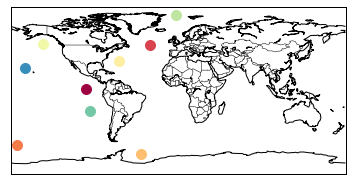

In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap()
cmap=matplotlib.cm.get_cmap('Spectral', 10)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'white')
map.drawmapboundary()
x1,y1 = map(zoo4_ds.lon[EQ_lon], zoo4_ds.lat[EQ_lat])
map.plot(x1, y1, 'o', markersize=10,color=cmap(0))
x2,y2 = map(zoo4_ds.lon[NA_lon], zoo4_ds.lat[NA_lat])
map.plot(x2, y2, 'o', markersize=10,color=cmap(1))
x3,y3 = map(zoo4_ds.lon[SO_lon], zoo4_ds.lat[SO_lat])
map.plot(x3, y3, 'o', markersize=10,color=cmap(2))
x4,y4 = map(zoo4_ds.lon[res_lon4], zoo4_ds.lat[res_lat4])
map.plot(x4, y4, 'o', markersize=10,color=cmap(3))
x5,y5 = map(zoo4_ds.lon[BATS_lon], zoo4_ds.lat[BATS_lat])
map.plot(x5, y5, 'o', markersize=10,color=cmap(4))
x6,y6 = map(zoo4_ds.lon[SPNP_lon], zoo4_ds.lat[SPNP_lat])
map.plot(x6, y6, 'o', markersize=10,color=cmap(5))
x7,y7 = map(zoo4_ds.lon[AO_lon], zoo4_ds.lat[AO_lat])
map.plot(x7, y7, 'o', markersize=10,color=cmap(6))
x8,y8 = map(zoo4_ds.lon[SOICE_lon], zoo4_ds.lat[SOICE_lat])
map.plot(x8, y8, 'o', markersize=10,color=cmap(7))
x9,y9 = map(zoo4_ds.lon[SP_lon], zoo4_ds.lat[SP_lat])
map.plot(x9, y9, 'o', markersize=10,color=cmap(8))
#map.plot(pp_ds.ppChl[0,0,100, 300], 'bo', markersize=24) 
plt.show()

In [18]:
month = np.arange(1, 13, 1)
month.shape

(12,)

In [50]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 30,
        }

phytoC = np.stack([ppC_ds.ppC, mp1C_ds.mp1C, diazC_ds.diazC, 
                               diat1C_ds.diat1C, mp2C_ds.mp2C, diat2C_ds.diat2C, 
                               mp3C_ds.mp3C, diat3C_ds.diat3C, mp4C_ds.mp4C])

### Oligotrophc region

fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,OP_phyto[0,:], '-o', color='#86daf4',markersize=5,label='picoplankton')
pylab.plot(month,OP_phyto[3,:], '-o', color='#000140',markersize=5,label='diatom 1')
pylab.plot(month,OP_phyto[5,:], '-o', color='#000140',markersize=7,label='diatom 2 ')
pylab.plot(month,OP_phyto[7,:], '-o', color='#000140',markersize=10,label='diatom 3 ')
pylab.plot(month,OP_phyto[2,:], '-o', color='#60baf7',markersize=5,label='diazotroph ')
pylab.plot(month,OP_phyto[1,:], '-o', color='#2d80a4',markersize=5,label='mixed phytoplankton 1 ')
pylab.plot(month,OP_phyto[4,:], '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
pylab.plot(month,OP_phyto[6,:], '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
pylab.plot(month,OP_phyto[8,:], '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
pylab.plot(month,OP_zoo[0,:], '-o', color='#FCD19E',markersize=5,label='micozooplankton 1')
pylab.plot(month,OP_zoo[1,:], '-o', color='#FCD19E',markersize=7,label='micozooplankton 2')
pylab.plot(month,OP_zoo[2,:], '-o', color='#DE7C08',markersize=5,label='mesozooplankton 1 ')
pylab.plot(month,OP_zoo[3,:], '-o', color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
pylab.plot(month,OP_zoo[4,:], '-o', color='#DE7C08',markersize=10,label='mesozooplankton 3 ')
pylab.plot(month,OP_zoo[5,:], '-o', color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=24, fontdict=font)
plt.ylim(top=250)
pylab.title('Pacific subtropical gyre', fontsize=24, fontdict=font)
from matplotlib.pyplot import gca
a = gca()
a.set_xticklabels(a.get_xticks(), font)
a.set_yticklabels(a.get_yticks(), font)
#plt.ylim(top=250)
plt.xticks(np.arange(0.5,12.5,1), ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.yticks(fontsize= 24,);plt.xticks(fontsize= 24);
pylab.show()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/OP_zoo_phyto_'+new_file+'_'+new_year+'_year.png',dpi=600, bbox_inches='tight')

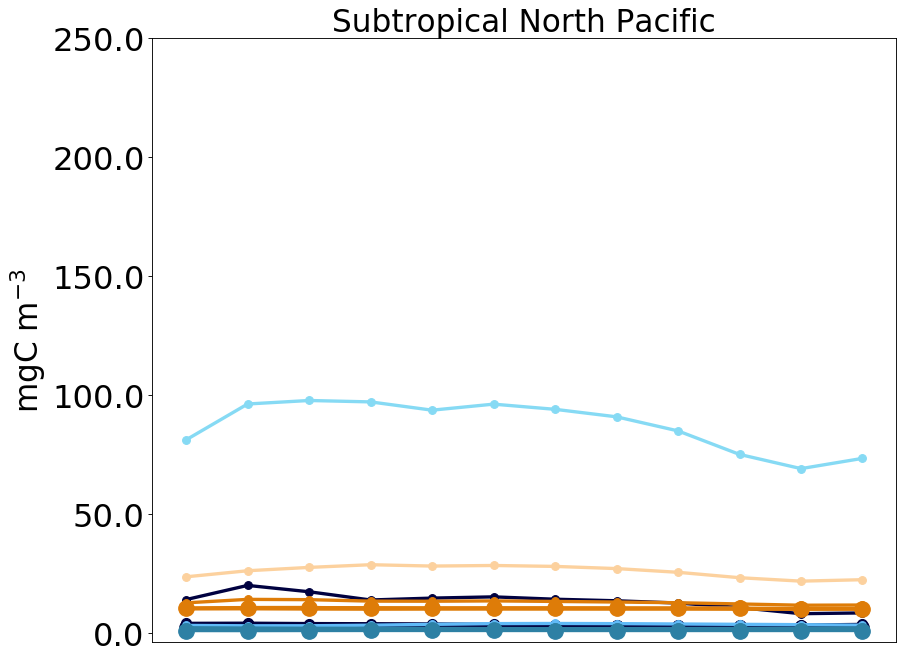

In [70]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,SP_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,SP_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,SP_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,SP_phyto[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,SP_phyto[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,SP_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
pylab.plot(month,SP_phyto[4,:], '-o', color='#2d80a4',markersize=9,linewidth = 3,label='mixed phytoplankton 2 ')
pylab.plot(month,SP_phyto[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,SP_phyto[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,SP_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,SP_zoo[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,SP_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,SP_zoo[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,SP_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,SP_zoo[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=250)
pylab.title('Subtropical North Pacific', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
#plt.ylim(top=250)
plt.yticks(fontsize= 29,);plt.xticks(fontsize= 29);
pylab.show()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/ONP_zoo_phyto_'+new_file+'_'+new_year+'_year.png',dpi=600, bbox_inches='tight')

## North Atlantic

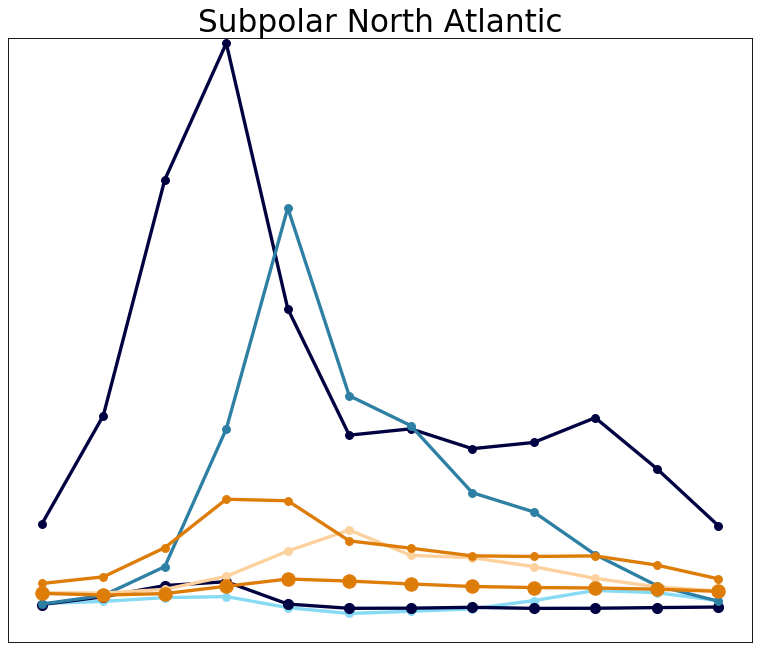

In [68]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,NA_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,NA_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,NA_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
#pylab.plot(month,NA_phyto[7,:], '-o', color='#000140',markersize=10,label='diatom 3 ')
#pylab.plot(month,NA_phyto[2,:], '-o', color='#60baf7',markersize=5,label='diazotroph ')
pylab.plot(month,NA_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
#pylab.plot(month,NA_phyto[4,:], '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
#pylab.plot(month,NA_phyto[6,:], '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
#pylab.plot(month,NA_phyto[8,:], '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
pylab.plot(month,NA_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
#pylab.plot(month,NA_zoo[1,:], '-o', color='#FCD19E',markersize=7,label='micozooplankton 2')
pylab.plot(month,NA_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
#pylab.plot(month,NA_zoo[3,:], '-o', color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
pylab.plot(month,NA_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
#pylab.plot(month,NA_zoo[5,:], '-o', color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#pylab.ylabel('mgC $m^{-3}$', fontsize=24, fontdict=font)
plt.ylim(top=250)
pylab.title('Subpolar North Atlantic', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
pylab.show()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/NA_zoo_phyto_'+new_file+'_'+new_year+'_year.png',dpi=600, bbox_inches='tight')

## Subtropical North Atlantic 

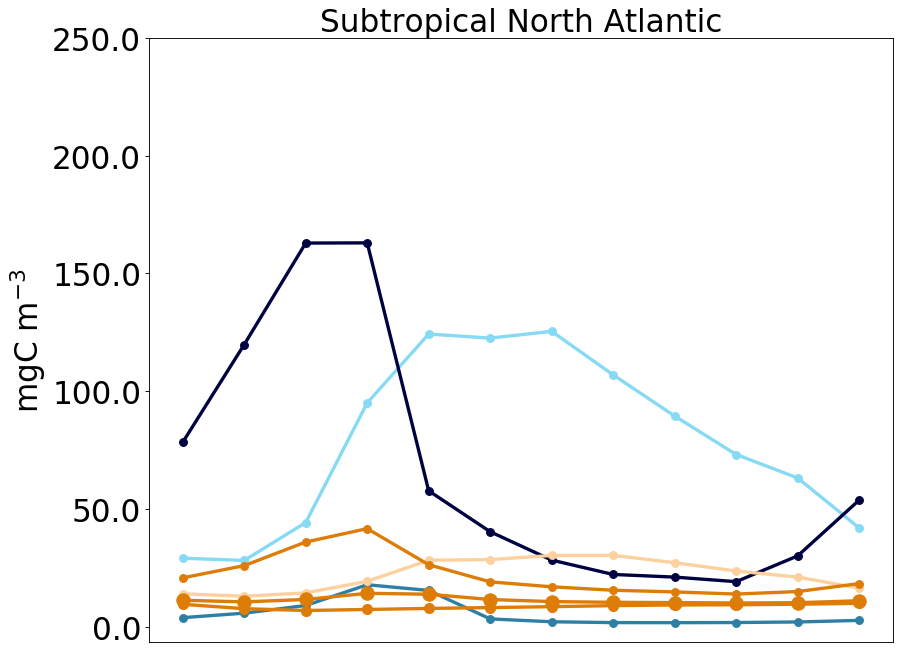

In [67]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,BATS_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,BATS_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
#pylab.plot(month,BATS_phyto[5,:], '-o', color='#000140',markersize=7,label='diatom 2 ')
#pylab.plot(month,BATS_phyto[7,:], '-o', color='#000140',markersize=10,label='diatom 3 ')
#pylab.plot(month,BATS_phyto[2,:], '-o', color='#60baf7',markersize=5,label='diazotroph ')
pylab.plot(month,BATS_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
#pylab.plot(month,BATS_phyto[4,:], '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
#pylab.plot(month,BATS_phyto[6,:], '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
#pylab.plot(month,BATS_phyto[8,:], '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
pylab.plot(month,BATS_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
#pylab.plot(month,BATS_zoo[1,:], '-o', color='#FCD19E',markersize=7,label='micozooplankton 2')
pylab.plot(month,BATS_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,BATS_zoo[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,BATS_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
#pylab.plot(month,BATS_zoo[5,:], '-o', color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=250)
pylab.title('Subtropical North Atlantic', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
#plt.xticks(np.arange(0.5,12.5,1), ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.yticks(fontsize= 28,);#plt.xticks(fontsize= 24);
pylab.show()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/BATS_zoo_phyto_'+new_file+'_'+new_year+'_year.png',dpi=600, bbox_inches='tight')

## Station PaPa Subpolar north pacific 

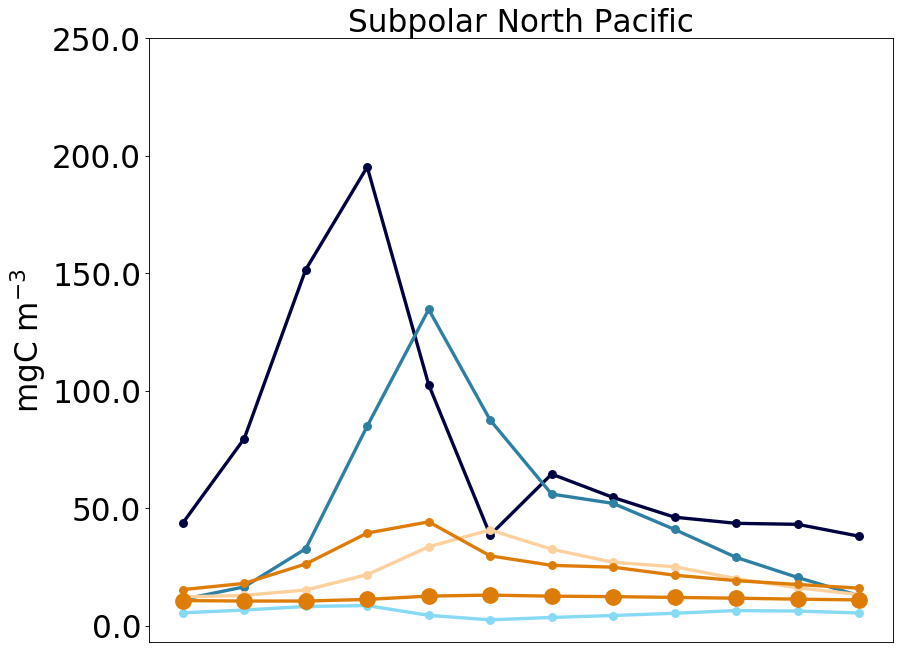

In [66]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,PAPA_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,PAPA_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
#pylab.plot(month,PAPA_phyto[5,:], '-o', color='#000140',markersize=7,label='diatom 2 ')
#pylab.plot(month,PAPA_phyto[7,:], '-o', color='#000140',markersize=10,label='diatom 3 ')
#pylab.plot(month,PAPA_phyto[2,:], '-o', color='#60baf7',markersize=5,label='diazotroph ')
pylab.plot(month,PAPA_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
#pylab.plot(month,PAPA_phyto[4,:], '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
#pylab.plot(month,PAPA_phyto[6,:], '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
#pylab.plot(month,PAPA_phyto[8,:], '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
pylab.plot(month,PAPA_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
#pylab.plot(month,PAPA_zoo[1,:], '-o', color='#FCD19E',markersize=7,label='micozooplankton 2')
pylab.plot(month,PAPA_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
#pylab.plot(month,PAPA_zoo[3,:], '-o', color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
#pylab.plot(month,PAPA_zoo[4,:], '-o', color='#DE7C08',markersize=10,label='mesozooplankton 3 ')
pylab.plot(month,PAPA_zoo[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=250)
pylab.title('Subpolar North Pacific', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
#plt.xticks(np.arange(0.5,12.5,1), ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.yticks(fontsize= 28,);#plt.xticks(fontsize= 24);
pylab.show()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/PAPA_zoo_phyto_'+new_file+'_'+new_year+'_year.png',dpi=600, bbox_inches='tight')

## Equatorial Pacific

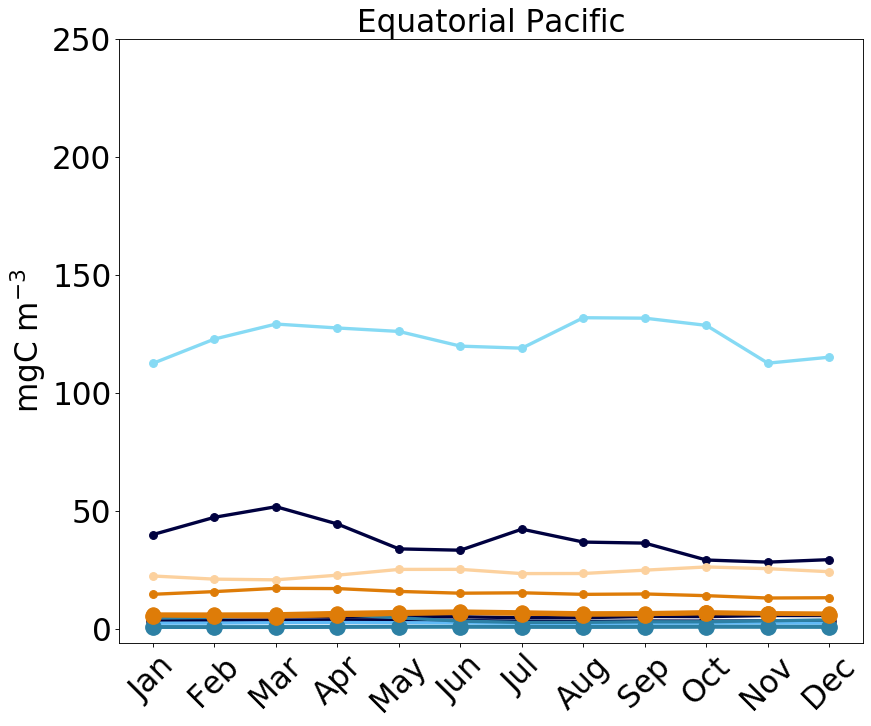

In [65]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
pylab.plot(month,EQ_OMZ_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,EQ_OMZ_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,EQ_OMZ_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,EQ_OMZ_phyto[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,EQ_OMZ_phyto[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,EQ_OMZ_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
#pylab.plot(month,EQ_OMZ_phyto[4,:], '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
pylab.plot(month,EQ_OMZ_phyto[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,EQ_OMZ_phyto[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,EQ_OMZ_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,EQ_OMZ_zoo[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,EQ_OMZ_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,EQ_OMZ_zoo[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,EQ_OMZ_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,EQ_OMZ_zoo[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=250)
pylab.title('Equatorial Pacific', fontsize=28)
#from matplotlib.pyplot import gca
#a = gca()
#a.set_xticklabels(a.get_xticks())
#a.set_yticklabels(a.get_yticks())
#plt.xticks(np.arange(1,13,1), ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xticklabels(xx, rotation = 45,fontsize= 28)
plt.yticks(fontsize= 28);plt.xticks(fontsize= 28);
pylab.show()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/EQ_OMZ_zoo_phyto_'+new_file+'_'+new_year+'_year.png',dpi=600, bbox_inches='tight')

## Southern Ocean

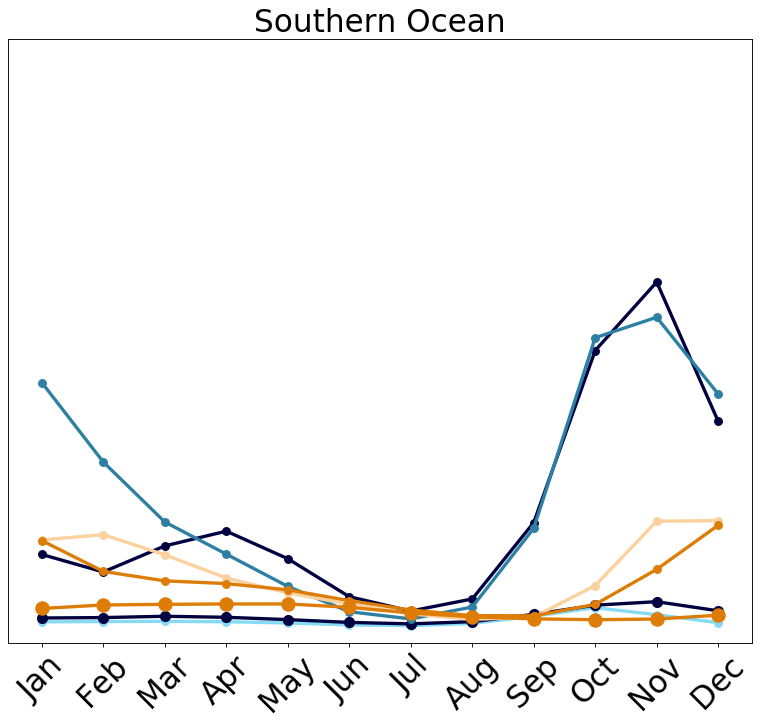

In [63]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
pylab.plot(month,SO_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,SO_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,SO_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
#pylab.plot(month,SO_phyto[7,:], '-o', color='#000140',markersize=10,label='diatom 3 ')
#pylab.plot(month,SO_phyto[2,:], '-o', color='#60baf7',markersize=5,label='diazotroph ')
pylab.plot(month,SO_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
#pylab.plot(month,SO_phyto[4,:], '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
#pylab.plot(month,SO_phyto[6,:], '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
#pylab.plot(month,SO_phyto[8,:], '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
pylab.plot(month,SO_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
#pylab.plot(month,SO_zoo[1,:], '-o', color='#FCD19E',markersize=7,label='micozooplankton 2')
pylab.plot(month,SO_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
#pylab.plot(month,SO_zoo[3,:], '-o', color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
pylab.plot(month,SO_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
#pylab.plot(month,SO_zoo[5,:], '-o', color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#pylab.ylabel('mgC $m^{-3}$', fontsize=24, fontdict=font)
plt.ylim(top=250)
pylab.title('Southern Ocean', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
#a.set_xticklabels(a.get_xticks(), font)
ax.set_xticklabels(xx, rotation = 45,fontsize= 28)
#a.set_yticklabels(a.get_yticks(), font)
#plt.xticks(np.arange(1,13,1), ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#plt.xticks(fontsize= 24);
pylab.show()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/SO_zoo_phyto_'+new_file+'_'+new_year+'_year.png',dpi=600, bbox_inches='tight')

## Arctic Ocean

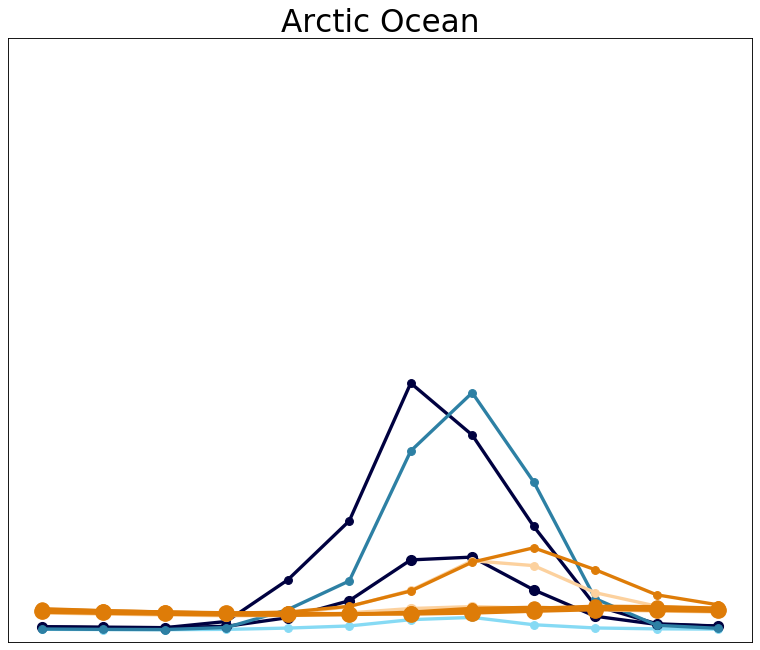

In [62]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,AO_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,AO_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,AO_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
#pylab.plot(month,AO_phyto[7,:], '-o', color='#000140',markersize=10,label='diatom 3 ')
#pylab.plot(month,AO_phyto[2,:], '-o', color='#60baf7',markersize=5,label='diazotroph ')
pylab.plot(month,AO_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
#pylab.plot(month,AO_phyto[4,:], '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
#pylab.plot(month,AO_phyto[6,:], '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
#pylab.plot(month,AO_phyto[8,:], '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
pylab.plot(month,AO_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,AO_zoo[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,AO_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,AO_zoo[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,AO_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,AO_zoo[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
plt.ylim(top=250)
pylab.title('Arctic Ocean', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
pylab.show()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/AO_zoo_phyto_'+new_file+'_'+new_year+'_year.png',dpi=600, bbox_inches='tight')

## Southern Ocean Sea-ice zone

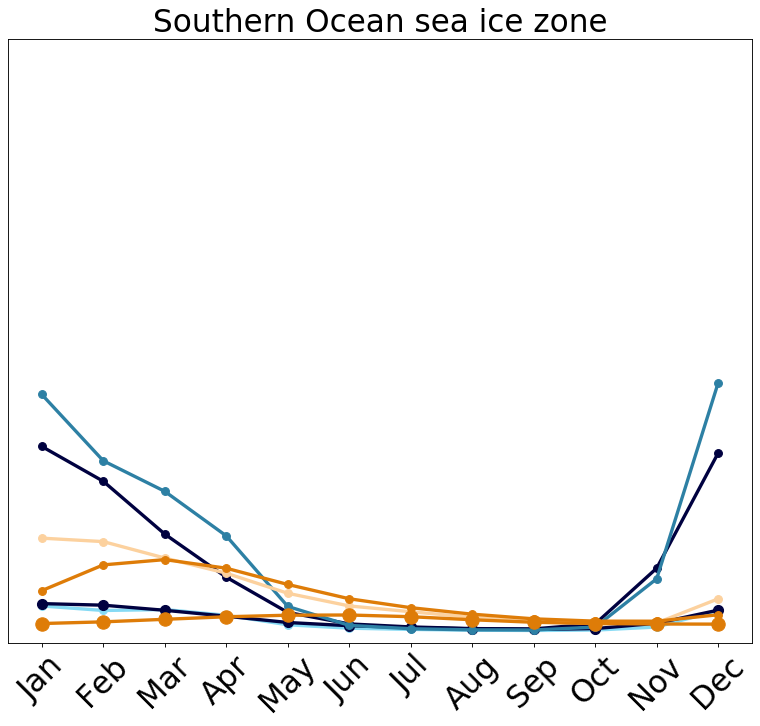

In [61]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
month = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.plot(month,SO_ICE_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3, label='picoplankton')
ax.plot(month,SO_ICE_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
ax.plot(month,SO_ICE_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
#pylab.plot(month,SO_ICE_phyto[7,:], '-o', color='#000140',markersize=10,label='diatom 3 ')
#pylab.plot(month,SO_ICE_phyto[2,:], '-o', color='#60baf7',markersize=5,label='diazotroph ')
ax.plot(month,SO_ICE_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
#pylab.plot(month,SO_ICE_phyto[4,:], '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
#pylab.plot(month,SO_ICE_phyto[6,:], '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
#pylab.plot(month,SO_ICE_phyto[8,:], '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
ax.plot(month,SO_ICE_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
#pylab.plot(month,SO_ICE_zoo[1,:], '-o', color='#FCD19E',markersize=7,label='micozooplankton 2')
ax.plot(month,SO_ICE_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
#pylab.plot(month,SO_ICE_zoo[3,:], '-o', color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
ax.plot(month,SO_ICE_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
#pylab.plot(month,SO_ICE_zoo[5,:], '-o', color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#pylab.ylabel('mgC $m^{-3}$', fontsize=28)
plt.ylim(top=250)
pylab.title('Southern Ocean sea ice zone', fontsize=28)
a = gca()
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
month = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#a.set_xticklabels(a.get_xticks(), font)
ax.set_xticklabels(xx, rotation = 45,fontsize= 28)
#plt.xticks(np.arange(1,13,1), ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#plt.xticks(fontsize= 28, rotate=45);
pylab.show()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/SO_ICE_zoo_phyto_'+new_file+'_'+new_year+'_year.png',dpi=600, bbox_inches='tight')

In [35]:
ds.z_w

<xarray.DataArray 'z_w' (z_w: 60)>
array([     0.   ,   1000.   ,   2000.   ,   3000.   ,   4000.   ,   5000.   ,
         6000.   ,   7000.   ,   8000.   ,   9000.   ,  10000.   ,  11000.   ,
        12000.   ,  13000.   ,  14000.   ,  15000.   ,  16000.   ,  17019.682,
        18076.129,  19182.125,  20349.932,  21592.344,  22923.312,  24358.453,
        25915.58 ,  27615.26 ,  29481.47 ,  31542.373,  33831.227,  36387.473,
        39258.047,  42498.887,  46176.656,  50370.688,  55174.91 ,  60699.668,
        67072.86 ,  74439.805,  82960.695,  92804.35 , 104136.82 , 117104.016,
       131809.36 , 148290.08 , 166499.2  , 186301.44 , 207487.39 , 229803.9  ,
       252990.4  , 276809.84 , 301067.06 , 325613.84 , 350344.88 , 375189.2  ,
       400101.16 , 425052.47 , 450026.06 , 475012.   , 500004.7  , 525000.94 ],
      dtype=float32)
Coordinates:
  * z_w      (z_w) float32 0.0 1000.0 2000.0 ... 475012.0 500004.7 525000.94
Attributes:
    long_name:  depth from surface to top of layer
